In [4]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [5]:

import os
os.getcwd()


'C:\\Users\\Dell'

In [9]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '3D Objects',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TM.blf',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{53b39e88-18c4-11ea-a811-000d3aa4692b}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'titanic',
 'Untitled.ipynb',
 'Videos']

In [18]:

train = pd.read_csv("C:/Users/Dell/Documents/train.csv")
test = pd.read_csv("C:/Users/Dell/Documents/test.csv")
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Basic Info
train.info()

# Summary Statistics
train.describe()

# Check for missing values
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Survival Count (0 = No, 1 = Yes)')

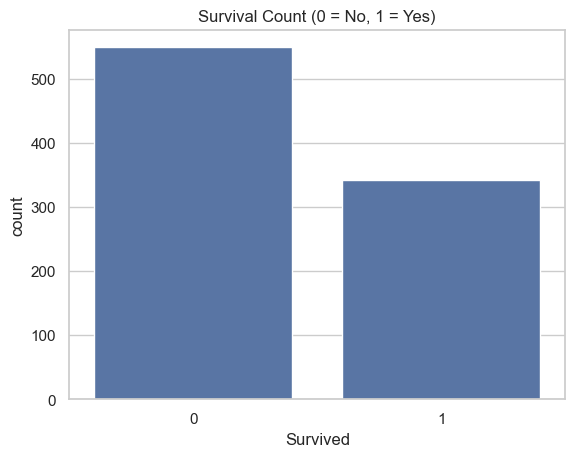

In [20]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Count (0 = No, 1 = Yes)")


Text(0.5, 1.0, 'Passenger Class Distribution')

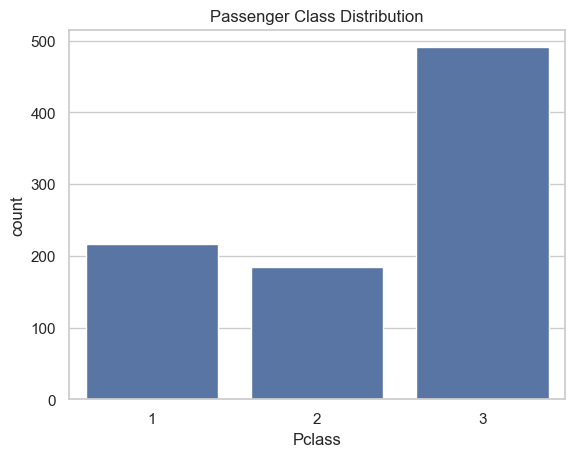

In [21]:
sns.countplot(x='Pclass', data=train)
plt.title("Passenger Class Distribution")


Text(0.5, 1.0, 'Gender Distribution')

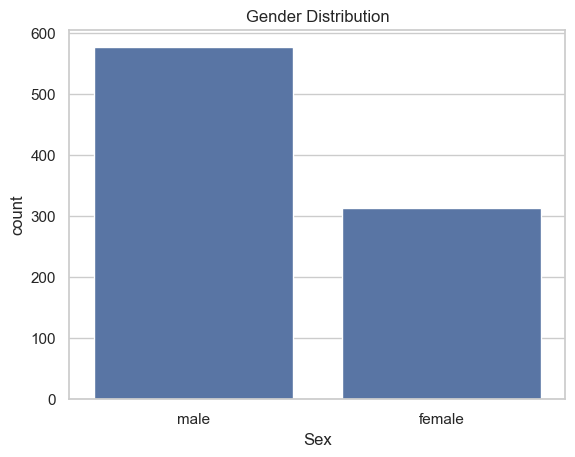

In [22]:
sns.countplot(x='Sex', data=train)
plt.title("Gender Distribution")


Text(0.5, 1.0, 'Age Distribution')

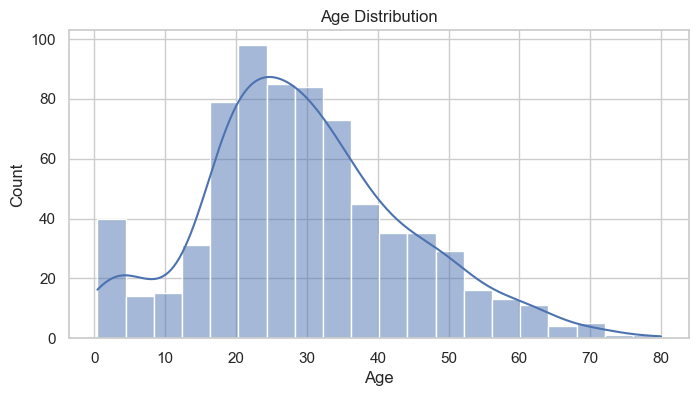

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(train['Age'].dropna(), kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Survival by Gender')

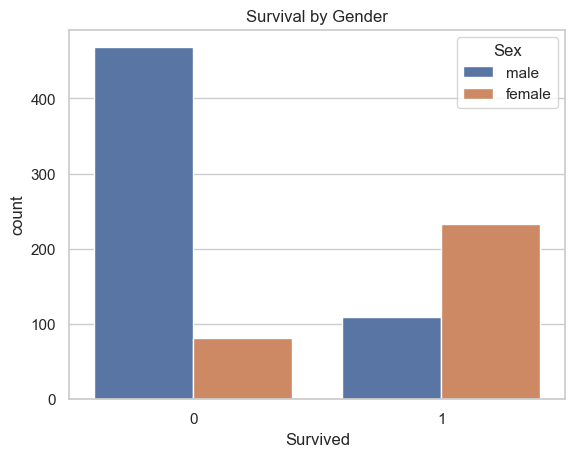

In [24]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")


Text(0.5, 1.0, 'Survival by Class')

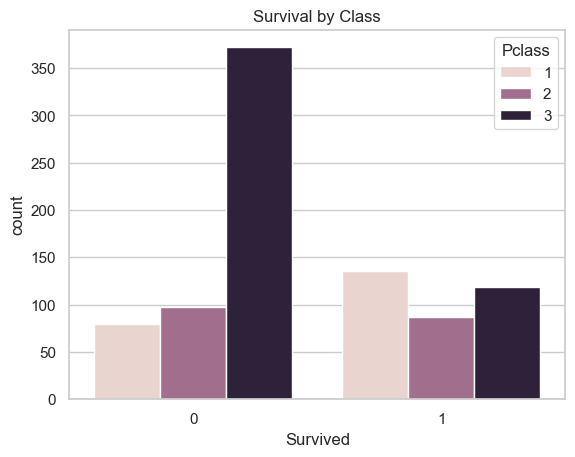

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Survival by Class")


Text(0.5, 1.0, 'Age vs Survival')

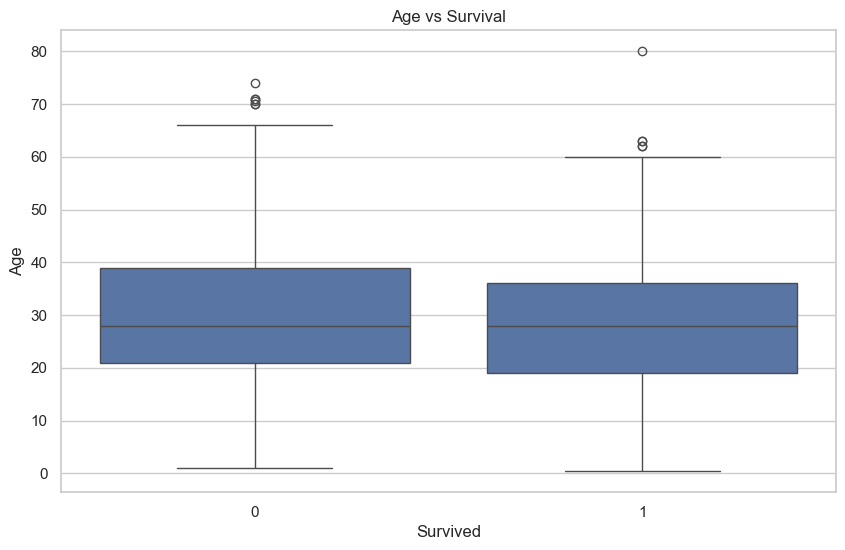

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title("Age vs Survival")


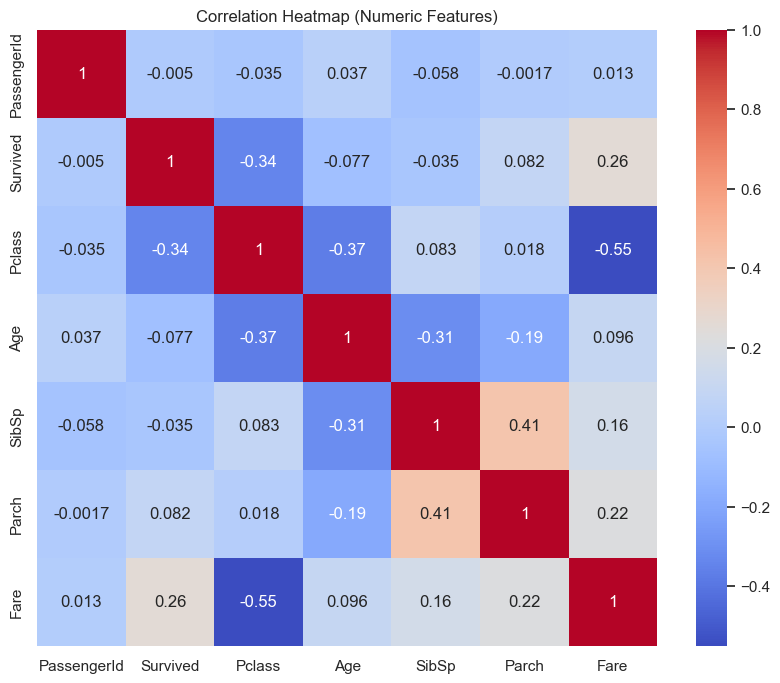

In [28]:
corr = train.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



In [29]:
# Fill Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop Cabin
train.drop('Cabin', axis=1, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\638704536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_5004\638704536.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [ ]:
# Summary of Findings:
- Females had a significantly higher survival rate than males.
- Passengers in 1st class were more likely to survive than those in 3rd class.
- Younger passengers (children) had slightly higher survival chances.
- Fare was positively correlated with survival.
- Embarked location had minor variation in survival rate.
